<a href="https://colab.research.google.com/github/RaminTKhameneh/SYS611HWs/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy as dc
import scipy.stats as st
import cmath

## ***2.1 Discrete Process Generator***

**Part a**

In [ ]:
set_x_y = []
for x in range(6):
  for y in range(6):
    temp = [x+1,y+1]
    set_x_y.append(temp)
set_x_y

X = []
for element in set_x_y:
  X.append(max(element))
pd.DataFrame(X).T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,2,3,4,5,6,2,2,3,4,...,5,5,5,6,6,6,6,6,6,6


**Part b**

In [ ]:
data = pd.Series(X)

count = data.value_counts()
frequency = []
sum = 0
for ele in range(6):
  sum += count[ele+1]

PMF = []
for ele in range(6):
  PMF.append([ele+1,count[ele+1]/sum])

pd.DataFrame(PMF)


,0,1
0,1,0.027778
1,2,0.083333
2,3,0.138889
3,4,0.194444
4,5,0.250000
5,6,0.305556


In [ ]:
CDF = []
temp = 0
for ele in PMF:
  temp += ele[1]
  CDF.append([ele[0],temp])
pd.DataFrame(CDF)


,0,1
0,1,0.027778
1,2,0.111111
2,3,0.250000
3,4,0.444444
4,5,0.694444
5,6,1.000000


**Part c**

In [ ]:
E_x = np.sum([ele[0]*ele[1] for ele in PMF])
E_x

4.472222222222222

**Part d**

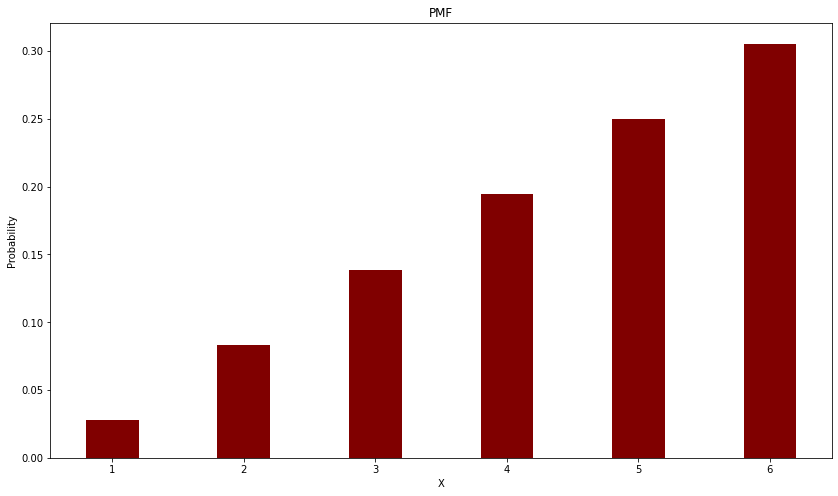

In [ ]:
data = {'1':PMF[0][1], '2':PMF[1][1], '3':PMF[2][1],'4':PMF[3][1],'5':PMF[4][1],'6':PMF[5][1]}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (14, 8))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("PMF")
plt.show()

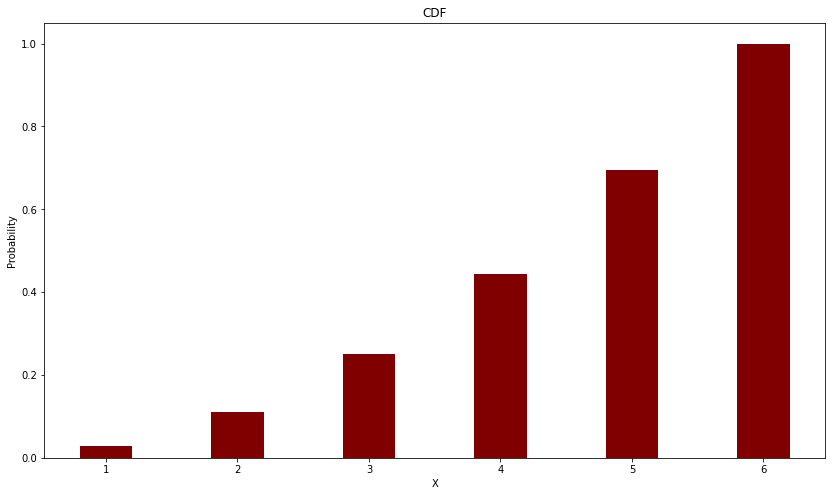

In [ ]:
data = {'1':CDF[0][1], '2':CDF[1][1], '3':CDF[2][1],'4':CDF[3][1],'5':CDF[4][1],'6':CDF[5][1]}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (14, 8))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("CDF")
plt.show()

**Part e**

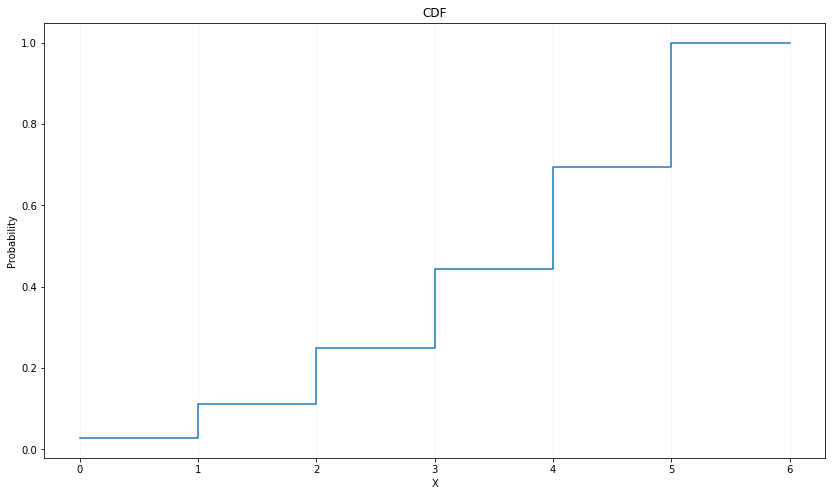

In [ ]:
data = {'0':CDF[0][1],'1':CDF[0][1], '2':CDF[1][1], '3':CDF[2][1],'4':CDF[3][1],'5':CDF[4][1],'6':CDF[5][1]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (14, 8))
plt.step(courses, values, label='pre (default)')

plt.grid(axis='x', color='0.95')
plt.title('CDF')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

**Part f**

In [ ]:
random_nums = np.random.random(size=1000)

In [ ]:
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
counter5 = 0
counter6 = 0

temp = dc(random_nums)

for rand in random_nums:
  if rand <= CDF[0][1]:
    counter1 += 1
  elif rand <= CDF[1][1]:
    counter2 += 1
  elif rand <= CDF[2][1]:
    counter3 += 1
  elif rand <= CDF[3][1]:
    counter4 += 1
  elif rand <= CDF[4][1]:
    counter5 += 1
  else:
    counter6 += 1

for i in range(len(temp)):
  if temp[i] <= CDF[0][1]:
    temp[i] = dc(1)
  elif temp[i]  <= CDF[1][1]:
    temp[i] = dc(2)
  elif temp[i] <= CDF[2][1]:
    temp[i] = dc(3)
  elif temp[i] <= CDF[3][1]:
    temp[i] = dc(4)
  elif temp[i] <= CDF[4][1]:
    temp[i] = dc(5)
  else:
    temp[i] = dc(6)


In [ ]:
count = [counter1, counter2, counter3, counter4, counter5, counter6]
count

[26, 76, 163, 188, 252, 295]

**(i)**

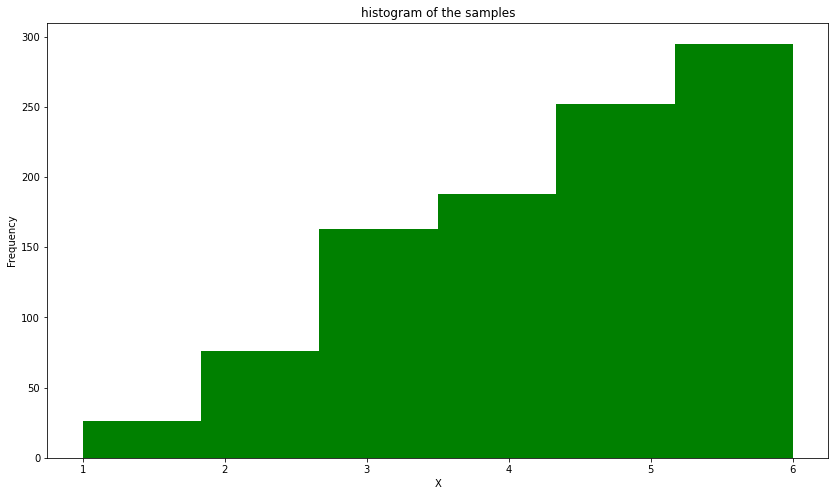

In [ ]:
fig = plt.figure(figsize = (14, 8))

n, bins, patches = plt.hist(temp, 6, density=False, facecolor='g')

plt.title('histogram of the samples')
plt.xlabel("X")
plt.ylabel("Frequency")
plt.show()

**ii**

In [ ]:
np.average(temp)

4.449

**iii**

In [ ]:
np.std(temp)

1.3897478188506

**iv**

In [ ]:
st.t.interval(alpha=0.95, df=len(temp)-1, loc=np.mean(temp))

(2.486658538866551, 6.411341461133448)

#2.2 Continuous Process Generator

**Part a**

$$
E(y) = \int_∞^∞ y(\frac{9-y}{18}) \;dy = \int_∞^3 y(\frac{9-y}{18}) \;dy + \int_3^9 y(\frac{9-y}{18}) \;dy + \int_9^∞ y(\frac{9-y}{18}) \;dy
$$

$$
E(y) = 0 + \int_3^9 y(\frac{9-y}{18}) \;dy + 0 = 5
$$

**Part b**

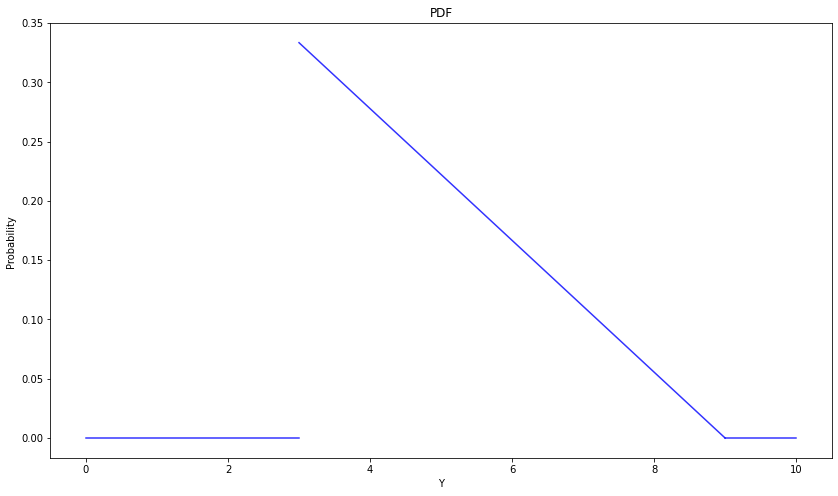

In [ ]:

fig = plt.figure(figsize = (14, 8))
plt.title('PDF')
plt.xlabel('Y')
plt.ylabel('Probability ')

y = np.linspace(3, 9, 100)
f_y = (9-y)/18

a = np.linspace(0, 3, 100)
b = 0 * a 

c = np.linspace(9, 10, 100)
d = 0 * c

plt.plot(y, f_y, 'b', alpha = 0.8)
plt.plot(a, b, 'b', alpha = 0.8)
plt.plot(c, d, 'b', alpha = 0.8)

plt.show()

**Part c**


$$
CDF = \int_{-\infty}^{+\infty} (\frac{9-y}{18}) \;dy = \frac{18y-y^2}{36} + c\
\forall (c = 0, 3 \leq y \leq 9)
$$
$$
CDF = 0\
\forall y \leq 3
$$
$$
CDF = 1\
\forall y \geq 9
$$

**Part d**

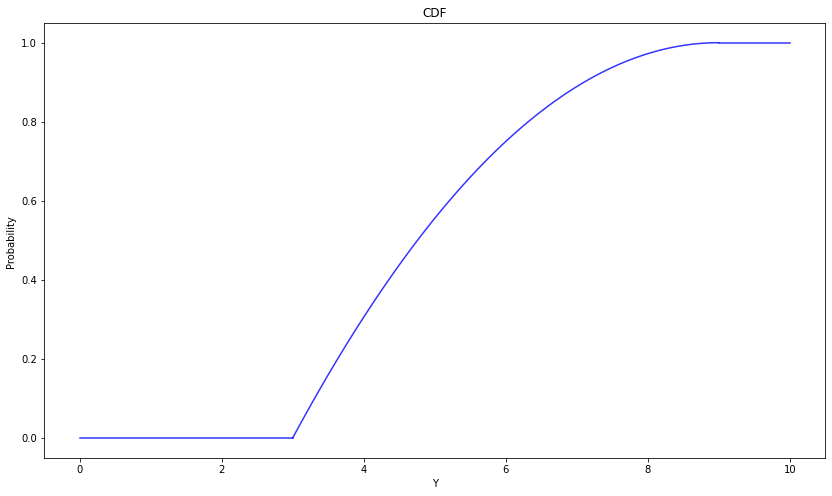

In [ ]:
fig = plt.figure(figsize = (14, 8))
plt.title('CDF')
plt.xlabel('Y')
plt.ylabel('Probability ')

y = np.linspace(3, 9, 100)
f_y = (y/2) - (y**2/36) - (1.25)

a = np.linspace(0, 3, 100)
b = 0 * a 

c = np.linspace(9, 10, 100)
d = 1 + c*0

plt.plot(y, f_y, 'b', alpha = 0.8)
plt.plot(a, b, 'b', alpha = 0.8)
plt.plot(c, d, 'b', alpha = 0.8)

plt.show()

**Part e**

In [ ]:
random_nums = np.random.random(size=1000)

(i)

In [ ]:
inv = []
for ele in random_nums:
  coeff = [-1/36,0.5,-1.25-ele]
  solution = np.roots(coeff)
  for sol in solution:
    if sol > 9:
      continue
    else: 
      inv.append(sol)
len(inv)

1000

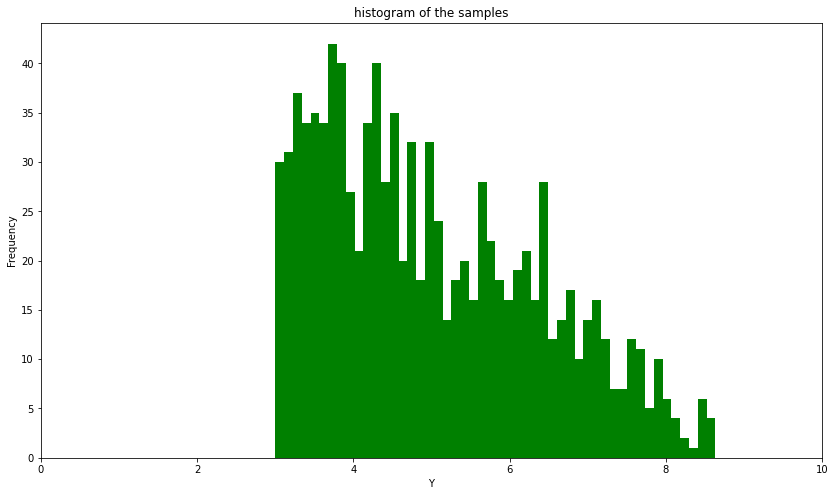

In [ ]:
fig = plt.figure(figsize = (14, 8))
n, bins, patches = plt.hist(inv, 50, density=False, facecolor='g')
plt.xlim([0,10])
plt.title('histogram of the samples')
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.show()

**(ii)**

In [ ]:
np.average(inv)

5.005191141441614

**(iii)**

In [ ]:
np.std(inv)

1.3969207763554274

(iv)

In [ ]:
st.t.interval(alpha=0.95, df=len(inv)-1, loc=np.mean(inv))

(3.0428496803081653, 6.967532602575062)

#2.3 Arrivals at Caf´e Java


**Part a**


In [ ]:
random_nums = np.random.random(size=1000)

In [ ]:
L = 2
sol = -np.log(1-random_nums) / L

In [ ]:
sol[0:10]

array([0.17115812, 0.21275443, 0.06764402, 0.97525345, 0.33354332,
       0.54790542, 0.07344255, 0.09972535, 0.21622447, 0.21540641])

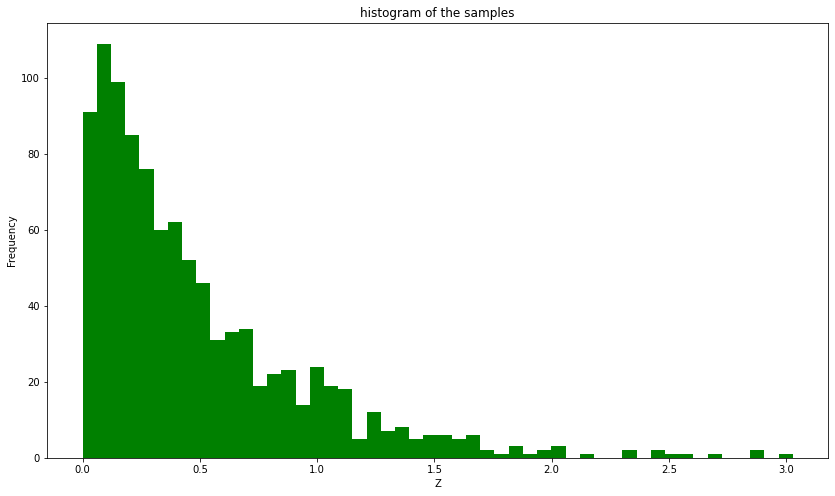

In [ ]:
fig = plt.figure(figsize = (14, 8))
n, bins, patches = plt.hist(sol, 50, density=False, facecolor='g')
plt.title('histogram of the samples')
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.show()

**Part b**

In [ ]:
t = [sol[0]]
for i in range(len(sol)):
  t.append(t[-1]+sol[i+1])
  if i == 998:
    break

In [ ]:
t[0:10]

[0.17115812215472054,
 0.3839125560098434,
 0.4515565767839297,
 1.426810026226484,
 1.7603533499742068,
 2.3082587749597794,
 2.381701329385401,
 2.481426683364871,
 2.697651152191073,
 2.913057560333289]

**Part c**

In [ ]:
t_i = np.array(t)
k = []
for i in range(300):
  k.append(np.count_nonzero(t_i <= i))


In [ ]:
k_i = [0]
for i in range(len(k)+1):
  k_i.append(k[i+1]-k[i])
  if i == 298:
    break
k_i.pop(0)

0

In [ ]:
k_i[1:6]

[2, 5, 3, 0, 0]

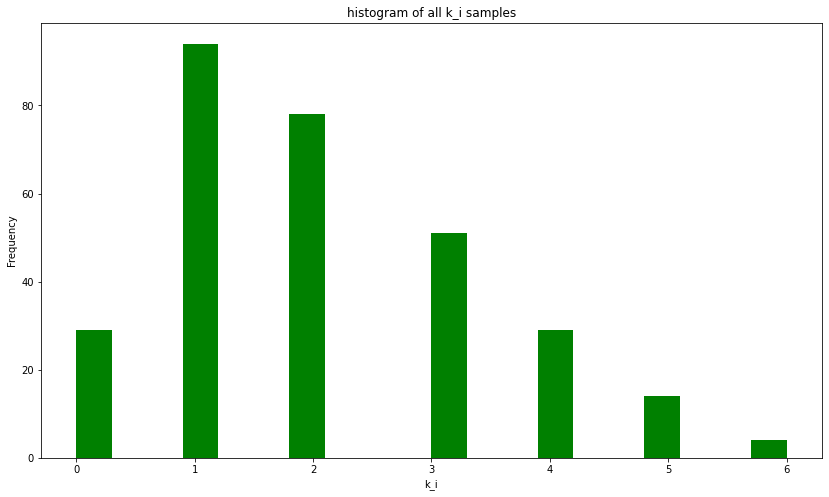

In [ ]:
fig = plt.figure(figsize = (14, 8))
n, bins, patches = plt.hist(k_i,20, density=False, facecolor='g')
plt.title('histogram of all k_i samples')
plt.xlabel("k_i")
plt.ylabel("Frequency")
plt.show()

**Part d**

Poisson Distribution